In [1]:
import math
import json
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook

import numpy as np
from htmresearch.support.cans.utils import *
from htmresearch.support.cans.basic_dynamics import *
%load_ext autoreload
%autoreload 2


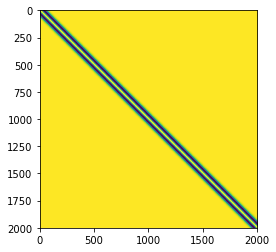

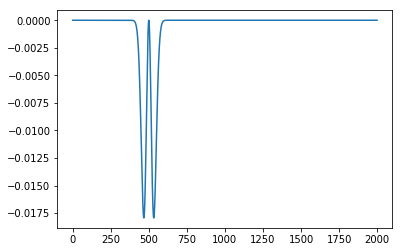

In [3]:


r = 140.
n = 2000


X = np.linspace(0.,r, num=n)


D = np.zeros((n, n))
for i in range(n):
    for j in range(n):
            D[i,j] = np.absolute(X[i] - X[j])

        
# J = mexican_hat
# W = create_W(J, D, normalize=True)

J = W_zero
W = create_W(J, D, normalize=False)

# W[W>0]=0.

plt.imshow(W)
plt.show()

plt.plot(W[500])
plt.show()

# tonic = - np.mean(W[:,:], axis=1)
# plt.plot(tonic)



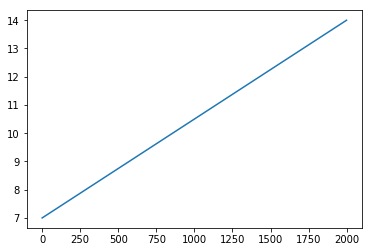

In [4]:
# beta_mask = 2 + np.linspace(0,2.,num=n) **2
beta_mask = np.linspace(7.,14.,num=n)

# beta_mask = np.ones(n)*2.

plt.plot(beta_mask)
plt.show()


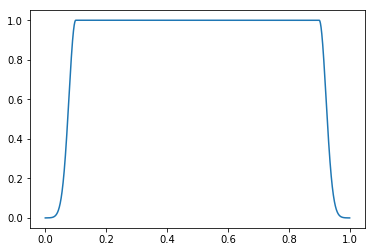

In [59]:
A = create_envelope(n, steepness=10., delta=0.1);

plt.plot(np.linspace(0.,1.,n),A);

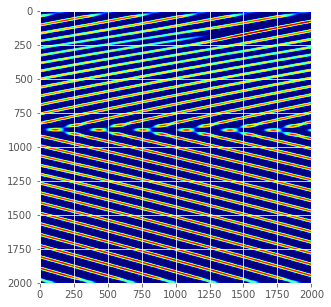

In [135]:
from htmresearch.support.gridcells.utils import cross_correlate
from scipy import ndimage
import numpy.fft as fft
from scipy.special import expit




T = 1000


S = np.zeros((T,n))

S[0] = np.zeros(n)
# S[0] = np.random.sample(n)*0.1

Beta = np.ones((T,n))*0.0



for t in range(1,T):
    
    s = S[t-1]
    b = np.zeros(n)
    
    tonic = 0.01
    beta  = Beta[t-1]
#     beta  = 0.01*Beta[t-1]

    
    s_   = evolve_step(W, b  + tonic, s, beta_mask*beta, mask=np.ones(n))  
    S[t] = s_

#     Beta[t] = Beta[t-1] - (s_ - np.mean(s_))
    alpha = 0.01
    Beta[t] = (1. - alpha)*Beta[t-1] - alpha*(s_ - np.mean(s_))



plt.figure(figsize=(20,5))
plt.imshow(S[-2000:].T, cmap="jet")
plt.show()





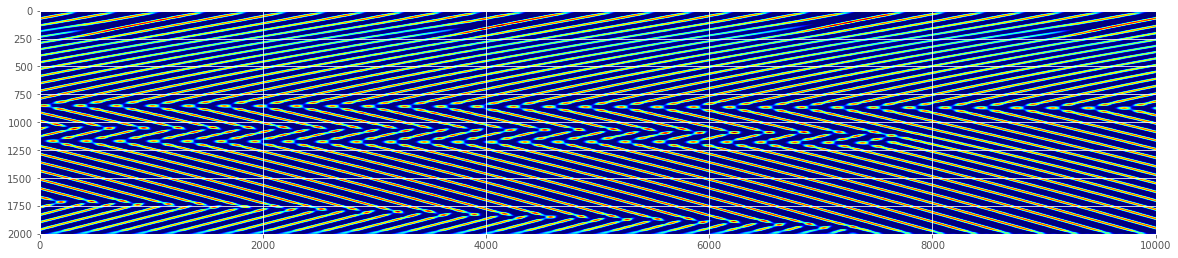

In [137]:
plt.figure(figsize=(20,5))
plt.imshow(S[-10000:].T, cmap="jet")
plt.show()



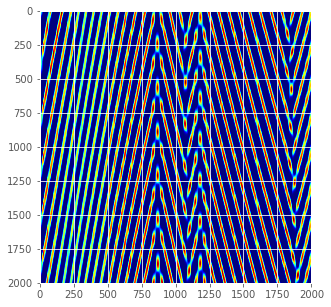

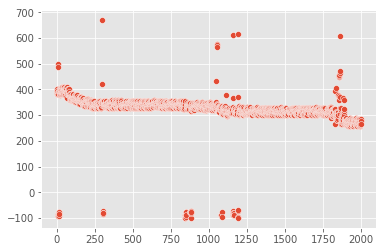

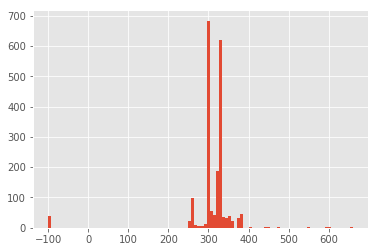

In [141]:




def compute_scales(W):
    gc = W.shape[1]
    scales = np.zeros(gc)
    for i in range(gc):
        f = (W[:,i] > 0.5).astype(float)
        df = f[1:] - f[:-1]
        ind = np.where(df == -1.)[0]
        ind = ind.astype(float)
        if len(ind) > 1:
            scales[i] = np.mean(ind[1:] - ind[:-1])
        else:
            scales[i] = -100

    return scales


plt.style.use('ggplot')

S_ = S/np.amax(S, axis=0, keepdims=True)


plt.figure(figsize=(20,5))
patch = S_[14000:16000]
plt.imshow(patch, cmap="jet")
plt.show()


scales = compute_scales(patch)

# np.clip(scales, -1,1000,scales)

plt.scatter(np.arange(n), scales + np.random.sample(n)*30., edgecolor="white")
plt.show()
plt.hist(scales, bins=100);


done


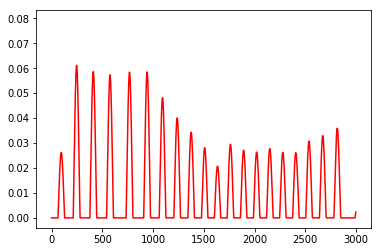

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def update_line(num, data, line):
    line.set_ydata(data[num,...])
    return line,


fig = plt.figure()

data = S[np.arange(5000,len(S), step=10)]

l, = plt.plot(np.arange(n), data[0], 'r-', animated=True)
ani = animation.FuncAnimation(fig, update_line, len(data), fargs=(data, l),
                                   interval=50, blit=True)

ani.save('moving_bumps_1-dim_.mp4')
print "done"
# plt.show()

100